In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1- Preprocessing

In [188]:
df_yearly = pd.DataFrame() 
df_raw_part1 =  pd.read_excel('séries_AirLiquide.xlsx',sheet_name ='part1')
df_raw_part2 = pd.read_excel('séries_AirLiquide.xlsx',sheet_name ='part2')
print(df_raw_part1.head(10))
print(df_raw_part2.head(10))

  Unnamed: 0  Div AirLiquide (lissé)  Prix Airliquide  Indice CAC40
0    1987M03                0.305684          11.1670           NaN
1    1987M04                0.306773          11.8679           NaN
2    1987M05                0.307862          11.3422           NaN
3    1987M06                0.308952          11.0714           NaN
4    1987M07                0.310043          10.9918           NaN
5    1987M08                0.311138          11.1511       1483.02
6    1987M09                0.312236          11.0873       1524.00
7    1987M10                0.313339          10.8962       1456.88
8    1987M11                0.314448           8.5226       1116.47
9    1987M12                0.315563           7.9969       1026.98
   year  Dividend    Price  CAC40_basis_points
0  2020     2.492  127.883            5735.843
1  2021     2.500  139.380            5256.000
2  2022     2.636  134.700            3942.000


In [189]:
df_raw_part1['year']=[x.split("M")[0] for x in df_raw_part1['Unnamed: 0']]
df_raw_part1['month']=[x.split("M")[1] for x in df_raw_part1['Unnamed: 0']]
df_yearly['Price']  = df_raw_part1.groupby('year')['Prix Airliquide'].mean().round(3)
# Calculate the necessary rates 
df_yearly['return_price'] = np.log(df_yearly['Price']/df_yearly['Price'].shift(1)) # p(t)/p(t-1)
df_yearly.head(10)

,Price,return_price
year,,
1987,10.609,NaN
1988,8.497,-0.221990
1989,10.926,0.251432
1990,12.387,0.125502
1991,12.834,0.035450
1992,14.827,0.144352
1993,16.328,0.096432
1994,17.275,0.056379
1995,18.181,0.051117


In [190]:
# Complete the missing values with df_raw_part2
df_raw_part2['year'] = df_raw_part2['year'].astype(str)
df_raw_part2.set_index('year',inplace = True)
df_raw_part2['return_price'] = np.log(df_raw_part2['Price']/df_raw_part2['Price'].shift(1)) # p(t)/p(t-1)
# Drop the row 2020
df_raw_part2.drop(['2020'],axis = 0, inplace = True)
df_raw_part2

,Dividend,Price,CAC40_basis_points,return_price
year,,,,
2021,2.500,139.38,5256.0,0.086088
2022,2.636,134.70,3942.0,-0.034154


In [191]:
# Integrate the values to the data
df_raw_part2.drop(['Dividend','CAC40_basis_points'],axis = 1, inplace = True)
df_yearly_1 = pd.concat([df_yearly,df_raw_part2], axis = 0)
df_yearly_1.tail(10)

,Price,return_price
year,,
2013,71.813,0.073666
2014,75.452,0.049431
2015,91.099,0.188450
2016,78.093,-0.154046
2017,89.857,0.140319
2018,96.670,0.073084
2019,108.114,0.111883
2020,127.883,0.167930
2021,139.380,0.086088


In [192]:
# Load french treasuries bonds and beta
return_french_bonds =  pd.read_excel('tx_dintéret_OAT_1987_2022.xlsx',sheet_name = 'Final', header = None)
return_french_bonds.columns = ['year','return_french_bonds']
return_french_bonds['year'] = return_french_bonds['year'].astype(str)
return_french_bonds.set_index('year', inplace = True)
return_french_bonds.head(10)

,return_french_bonds
year,
1987,0.0968
1988,0.0800
1989,0.0780
1990,0.0750
1991,0.0720
1992,0.0690
1993,0.0670
1994,0.0650
1995,0.0600


In [193]:
# Concatenate all our annual data
assets = pd.concat([df_yearly_1,return_french_bonds], axis=1)
print(df_yearly_final.head(5))
print(df_yearly_final.tail(5))

       Price  return_price  return_french_bonds
year                                           
1988   8.497     -0.221990                0.080
1989  10.926      0.251432                0.078
1990  12.387      0.125502                0.075
1991  12.834      0.035450                0.072
1992  14.827      0.144352                0.069
        Price  return_price  return_french_bonds
year                                            
2018   96.670      0.073084             0.007841
2019  108.114      0.111883             0.001302
2020  127.883      0.167930            -0.001453
2021  139.380      0.086088             0.007367
2022  134.700     -0.034154             0.017008


In [194]:
# Drop the row 1987
assets.drop(['1987'], axis=0, inplace = True)
assets.head(5)

,Price,return_price,return_french_bonds
year,,,
1988,8.497,-0.221990,0.080
1989,10.926,0.251432,0.078
1990,12.387,0.125502,0.075
1991,12.834,0.035450,0.072
1992,14.827,0.144352,0.069


In [195]:
log_ret = assets[['return_price','return_french_bonds']]
log_ret

,return_price,return_french_bonds
year,,
1988,-0.221990,0.080000
1989,0.251432,0.078000
1990,0.125502,0.075000
1991,0.035450,0.072000
1992,0.144352,0.069000
1993,0.096432,0.067000
1994,0.056379,0.065000
1995,0.051117,0.060000
1996,0.138271,0.062000


<AxesSubplot: ylabel='Density'>

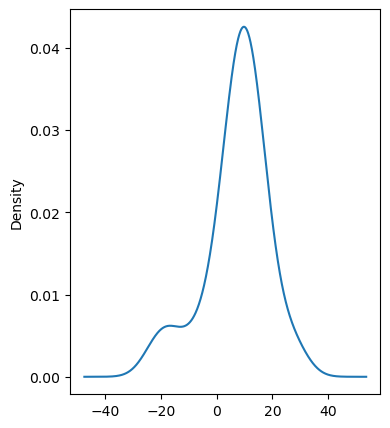

In [196]:
# Check normality of the distribution
(100*log_ret['return_price']).plot(kind='kde',figsize=(4,5))

In [220]:
# Check if our return assets are correlated
log_ret.cov()

,return_price,return_french_bonds
return_price,0.012018,-0.000054
return_french_bonds,-0.000054,0.000606


Since the covariance term between our returns is close to 0, then we will only take into account the variance of each return when calculating the realized volatility. Let's now build the 2 portfolios :

1 - portfolio A using realized volatilty as the measure of risk

2 - portfolio B using standard deviation as the measure of risk

For more details, consult this link on volatility calculation in a portfolio: https://www.investopedia.com/terms/p/portfolio-variance.asp#:~:text=Formula%20and%20Calculation%20of%20Portfolio%20Variance,-The%20most%20important&text=This%20means%20that%20the%20overall,2w1w2Cov

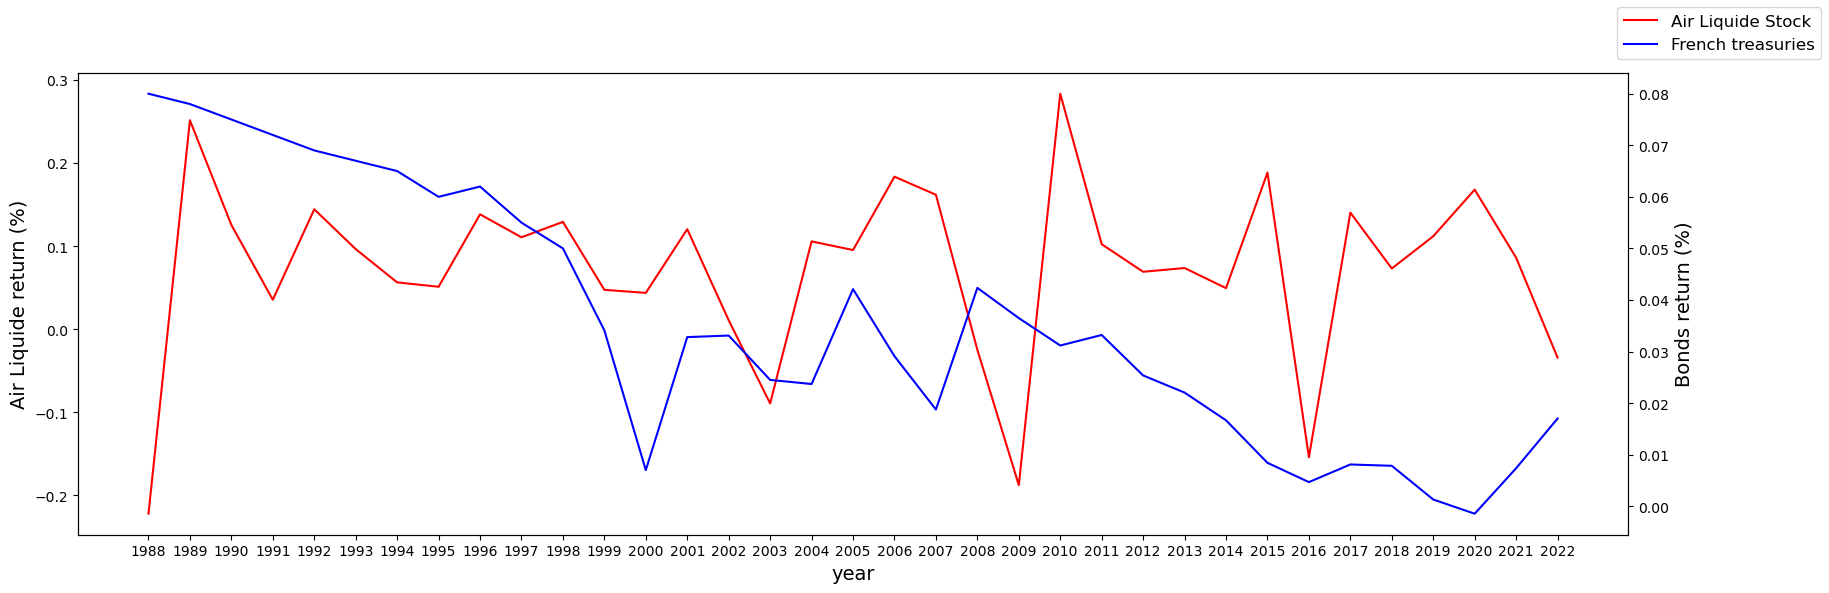

In [222]:
# Let's see how the returns evolve with time
fig,ax = plt.subplots(figsize=(20,6))
# make the dividend plot
ax.plot(log_ret.return_price, color = "red", label = "Air Liquide Stock ")
# ax.set_title("MA5 - Air liquide", fontsize = 24)
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
ax.set_ylabel("Air Liquide return (%)",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(log_ret.return_french_bonds, color = "blue", label = "French treasuries")
ax2.set_ylabel("Bonds return (%)",fontsize=14)
fig.legend(labels = ['Air Liquide Stock', 'French treasuries'], fontsize = 12)

### 2-Construct Optimized portfolio

#### 2-1 Definition of the portfolio function
The function will return an array of portfolio risks and returns for each weight applied on each asset

In [198]:
weights = np.array([0.5,0.5])

realized_vol_per_asset = np.sum(log_ret**2)
print(realized_vol_per_asset)
realized_vol_per_asset_weighted = realized_vol_per_asset*weights
print(realized_vol_per_asset_weighted)
realized_vol_portfolio = np.dot(weights.T,realized_vol_per_asset_weighted)
print(realized_vol_portfolio)
realized_risk=np.sqrt(realized_vol_portfolio)
print(realized_risk)

return_price           0.593135
return_french_bonds    0.064426
dtype: float64
return_price           0.296567
return_french_bonds    0.032213
dtype: float64
0.16439017942976772
0.40545058814825724


In [199]:
# Function that calculates the return and risk for a portfolio with given weights
def get_ret_risk_arr(weights, isStdRisk = False):
    
    # weights: defined the allocation in percentage for each asset
    # isStdRisk: if equal to False, then the risk is calculated as the realized volatility. 
    # If equal to True, it is given by the standard deviation of the return 
    
    # Return calculation 
    return_arr= np.sum(log_ret.mean()*weights)
    
    # Risk Calculation
    if isStdRisk :
        risk_arr = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    else :
        realized_vol_per_asset = np.sum(log_ret**2)
        realized_vol_per_asset_weighted = realized_vol_per_asset*weights
        realized_vol_portfolio = np.dot(weights.T,realized_vol_per_asset_weighted)
        risk_arr = np.sqrt(realized_vol_portfolio) 

    return return_arr, risk_arr

In [200]:
# Function that returns the possible portfolios for weights obtained with Monte Carlo shots
def create_possible_portfolios(num_ports = 1000, isStdRisk = False) :
    
    # num_ports : Determine the number of possible portofolios
    np.random.seed(101) 
    
    # Initialisation
    all_weights = np.zeros((num_ports,len(log_ret.columns)))
    return_arr = np.zeros(num_ports)
    risk_arr = np.zeros(num_ports)

    for ind in range(num_ports) :
        weights = np.array(np.random.random(len(log_ret.columns)))
        weights = weights/np.sum(weights) # Creation of random weights

        # Saving the weights
        all_weights[ind,:] = weights

        # Return calculation 
        return_arr[ind]= get_ret_risk_arr(weights, isStdRisk)[0]

        # Risk Calculation
        risk_arr[ind] = get_ret_risk_arr(weights, isStdRisk)[1]
            
    return return_arr, risk_arr, all_weights

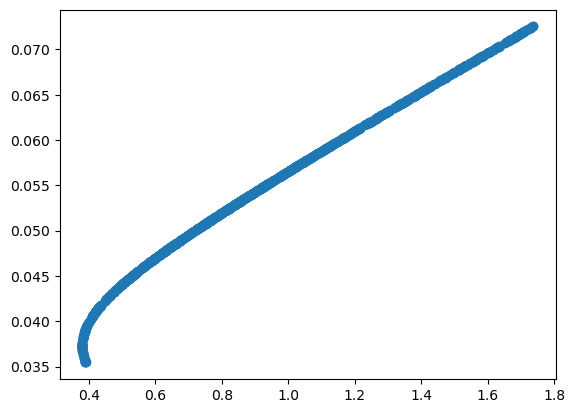

In [219]:
#Test 
portfolio_test = create_possible_portfolios(1000,True)

plt.scatter(portfolio_test[1],portfolio_test[0])

#### 2-2 Creation of the efficient frontier
We will use the results from all the portfolios to define the efficient frontier

In [203]:
# Constraints on our weights
def check_sum(weights) :
    # return 0 if the sum of weights is equal to 1
    return np.sum(weights)-1

In [204]:
from scipy.optimize import minimize

def efficient_frontier_lines(ret_arr, risk_arr,isStdRisk):
    
   ## Compute the efficient frontier
    frontier_volatility = [] # efficient on a volatility basis

    # The range of returns should be taken from the Monte Carlo shots to ease the computation
    return_max=max(ret_arr)
    return_min=min(ret_arr)
    frontier_return = np.linspace(return_min,return_max,100) # 100 defined points 
    # beware : the more points you have, greater is the computing time

    for possible_return in frontier_return: 
        # Constraint on the weight and the closure between the calculated return from weight and its target
        cons =({'type': 'eq','fun': check_sum},
               {'type': 'eq','fun': lambda w: get_ret_risk_arr(w,isStdRisk)[0] - possible_return}) 

        # LSE optimization   
        opt_results_vol = minimize(lambda w: get_ret_risk_arr(w,isStdRisk)[1],
                                   x0 = (0.5 , 0.5),
                                   method='SLSQP',
                                   bounds = ((0, 1), (0, 1)), 
                                   constraints = cons)

        # Save the results
        frontier_volatility.append(opt_results_vol['fun'])
        
    return frontier_return, frontier_volatility

#### 2-3 Construct portfolios A & B and their respective efficient frontiers

In [205]:
num_ports = 5000

portfolio_A = create_possible_portfolios(num_ports = num_ports, isStdRisk = False)
efficient_frontier_A = efficient_frontier_lines(ret_arr = portfolio_A[0], 
                                                risk_arr = portfolio_A[1],
                                                isStdRisk = False)

portfolio_B = create_possible_portfolios(num_ports = num_ports, isStdRisk = True)
efficient_frontier_B = efficient_frontier_lines(ret_arr = portfolio_B[0], 
                                                risk_arr = portfolio_B[1],
                                                isStdRisk = True)

In [215]:
print(portfolio_A[0])
print(portfolio_A[1])
print(len(efficient_frontier_A[0]))
print(len(efficient_frontier_A[1]))

[0.05307153 0.04069017 0.05218001 ... 0.07103689 0.05713187 0.0387297 ]
[0.38936187 0.24374097 0.3743018  ... 0.73768038 0.4620892  0.24116091]
100
100


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


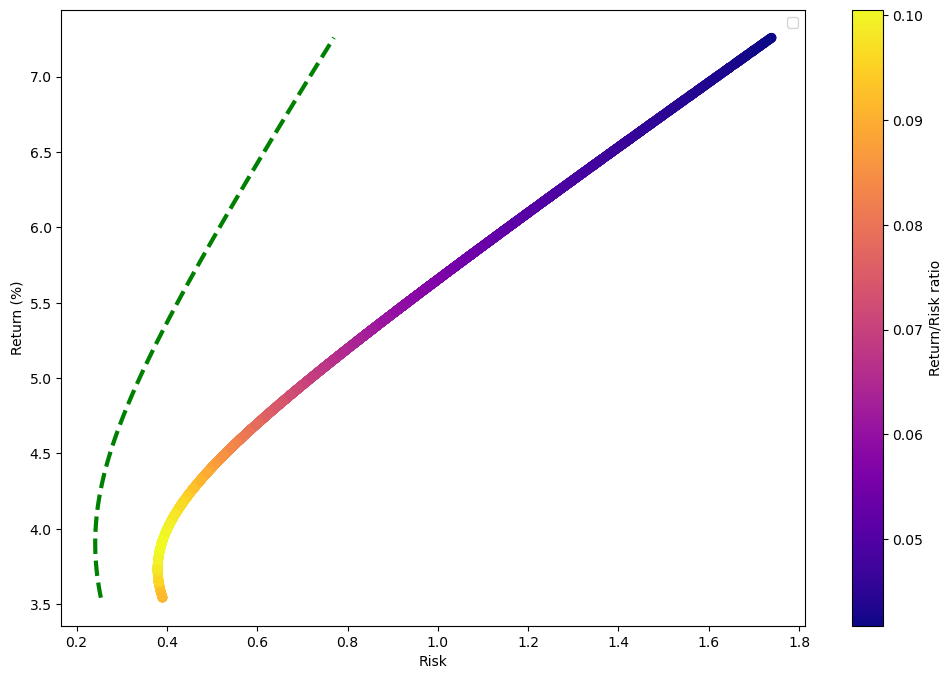

In [211]:
# plot the efficient frontier
ret_arr_B = portfolio_B[0]
risk_arr_B = portfolio_B[1]
ratio_return_risk_B =  ret_arr_B/risk_arr_B

plt.figure(figsize=(12,8))
plt.scatter(risk_arr_B, 100*ret_arr_B,c=ratio_return_risk_B,cmap='plasma')
plt.colorbar(label='Return/Risk ratio')
plt.xlabel('Risk')
plt.ylabel('Return (%)')

frontier_volatility_A = efficient_frontier_A[1]
frontier_return_A = efficient_frontier_A[0]

frontier_volatility_B = efficient_frontier_B[1]
frontier_return_B = efficient_frontier_B[0]

plt.plot(frontier_volatility_A,100*frontier_return_A,'g--',linewidth=3)
plt.plot(frontier_volatility_B,100*frontier_return_B,'b--',linewidth=3)
plt.legend()